# RNN and LSTM with TF2.0

### 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

### 간단한 모델 만들기(with Sequential( ))

In [2]:
# Sequential 정의
model = tf.keras.Sequential()

# 단어는 1000개, 노드의 크기(출력 차원)은 64로
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# 128개의 노드로 구성된 LSTM 생성
model.add(layers.LSTM(128))

# 마지막 레이어는 10개의 클래스로 출력. softmax classifier를 지난다.
model.add(layers.Dense(10, activation='softmax'))

# 출력
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


### MNIST 불러오기

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Normalize
sample, sample_label = x_train[0], y_train[0]

### 발전된 모델로 MNIST 분류기 만들기

In [8]:
# hyperparameter 세팅
batch_size = 64
input_dim = 28
units = 64
output_size = 10

In [22]:
# model 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units, input_shape=(None, input_dim)), # None으로 주면 optimize 해줌.
    # tf.keras.layers.BatchNormalization(), # BatchNormalization : overfitting이 덜 되게끔
    tf.keras.layers.Dense(output_size, activation = "softmax")])

# model compile, multiclass-classification을 할 때 loss는 무엇일까?
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [23]:
# 모델 실행
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size=batch_size, epochs=10)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9849 - accuracy: 0.6809 - val_loss: 0.2151 - val_accuracy: 0.9365
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1869 - accuracy: 0.9437 - val_loss: 0.1413 - val_accuracy: 0.9585
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1245 - accuracy: 0.9616 - val_loss: 0.1196 - val_accuracy: 0.9653
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0936 - accuracy: 0.9721 - val_loss: 0.1178 - val_accuracy: 0.9639
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0826 - accuracy: 0.9750 - val_loss: 0.0803 - val_accuracy: 0.9756
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0691 - accuracy: 0.9804 - val_loss: 0.0772 - val_accuracy: 0.9779
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0600 - accuracy: 0.9817 - val_loss: 0.0831 - val_accuracy: 0.9770
Epoch 

In [24]:
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("Test Score: ", score)
print("Test Accuracy: ", acc)

157/157 [==============================] - 0s 903us/step - loss: 0.0676 - accuracy: 0.9806
Test Score:  0.06764204800128937
Test Accuracy:  0.9805999994277954


### loss value 시각화

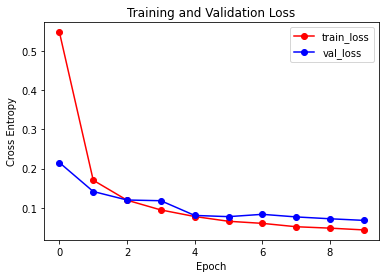

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label="train_loss")
plt.plot(val_loss, 'bo-', label="val_loss")
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.title('Training and Validation Loss')
plt.show()